In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh')

C:\Users\KimJeongwan\Anaconda3\envs\venv\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [3]:
ret = requests.get(" https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400")
ret

<Response [200]>

In [4]:
js = ret.json()
js

[{'close': 244,
  'date': 1424304000,
  'high': 244,
  'low': 225,
  'open': 225,
  'quoteVolume': 0.19311748,
  'volume': 46.27631267,
  'weightedAverage': 239.62777823},
 {'close': 240.25,
  'date': 1424390400,
  'high': 245,
  'low': 240.25,
  'open': 240.25011809,
  'quoteVolume': 0.23042935,
  'volume': 55.894897,
  'weightedAverage': 242.56847926},
 {'close': 245,
  'date': 1424476800,
  'high': 245,
  'low': 245,
  'open': 245,
  'quoteVolume': 0.06009077,
  'volume': 14.72223865,
  'weightedAverage': 245},
 {'close': 235,
  'date': 1424563200,
  'high': 249,
  'low': 235,
  'open': 245,
  'quoteVolume': 0.53905499,
  'volume': 129.12124785,
  'weightedAverage': 239.53260845},
 {'close': 235,
  'date': 1424649600,
  'high': 235.001,
  'low': 235,
  'open': 235.00000236,
  'quoteVolume': 0.41092569,
  'volume': 96.56756248,
  'weightedAverage': 235.00006166},
 {'close': 239.75,
  'date': 1424736000,
  'high': 239.75,
  'low': 235,
  'open': 235,
  'quoteVolume': 0.6267487,
  'vol

In [9]:
df = pd.DataFrame(js)
df
scaler = MinMaxScaler() // 0~1사이로 표현
df[['close']] = scaler.fit_transform(df[['close']])
df

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0.003428,1424304000,244.000000,225.000000,225.000000,0.193117,4.627631e+01,239.627778
1,0.003231,1424390400,245.000000,240.250000,240.250118,0.230429,5.589490e+01,242.568479
2,0.003480,1424476800,245.000000,245.000000,245.000000,0.060091,1.472224e+01,245.000000
3,0.002955,1424563200,249.000000,235.000000,245.000000,0.539055,1.291212e+02,239.532608
4,0.002955,1424649600,235.001000,235.000000,235.000002,0.410926,9.656756e+01,235.000062
5,0.003205,1424736000,239.750000,235.000000,235.000000,0.626749,1.491544e+02,237.981177
6,0.003100,1424822400,239.750000,237.750000,239.750000,0.927550,2.215841e+02,238.891722
7,0.003139,1424908800,239.800000,237.750000,237.750000,0.000650,1.554879e-01,239.116563
8,0.003690,1424995200,249.000000,238.500000,238.500000,1.589037,3.837554e+02,241.501825
9,0.003218,1425081600,251.000000,240.000000,240.000000,0.071330,1.714734e+01,240.394041


In [11]:
price = df['close'].values.tolist()
price

[0.0034278368698297933,
 0.0032309273586996947,
 0.0034803460727978203,
 0.0029552540431175573,
 0.0029552540431175573,
 0.003204672757215681,
 0.003099654351279629,
 0.00313903625350565,
 0.003690382884669925,
 0.003217803221637167,
 0.003795401290605977,
 0.004740566944030449,
 0.004647100562222272,
 0.005318168176678739,
 0.004110462809518489,
 0.004267984117318213,
 0.0042679843914162525,
 0.004267985745628597,
 0.004478021209064372,
 0.0058957694093270275,
 0.005108131365331727,
 0.00510813142361694,
 0.005061398178890919,
 0.005060873101038725,
 0.005428857595438652,
 0.005055622161838608,
 0.005055622163413884,
 0.00437772835204648,
 0.0045224602637016775,
 0.004454960511881502,
 0.004435645089785174,
 0.004662687837208973,
 0.004303349663071908,
 0.003350412436521174,
 0.0036103333860821093,
 0.0033504120500534394,
 0.003918939692428852,
 0.00367612641447527,
 0.00363626322497196,
 0.003971453807632816,
 0.0037081588072975617,
 0.003690382884669925,
 0.004005438102478082,
 0.00

In [17]:
"""
many to many
X
0.0034278368698297933,
 0.0032309273586996947,
 0.0034803460727978203,
Y 
  0.0029552540431175573,
 0.0029552540431175573,
 
many to one
(sample, 5, 1)
X
0.0034278368698297933,
 0.0032309273586996947,
 0.0034803460727978203,
 0.0029552540431175573,
 0.0029552540431175573,
Y
 (sample, 1)
 0.003204672757215681,
"""

window_size = 5
X = []
Y = []

for i in range(len(price)-window_size):
    #i = 0
    #j = 0,1,2,3,4
    X.append([price[i+j] for j in range(window_size)])
    Y.append(price[window_size+i])
    
print(X)
print(Y)

[[0.0034278368698297933, 0.0032309273586996947, 0.0034803460727978203, 0.0029552540431175573, 0.0029552540431175573], [0.0032309273586996947, 0.0034803460727978203, 0.0029552540431175573, 0.0029552540431175573, 0.003204672757215681], [0.0034803460727978203, 0.0029552540431175573, 0.0029552540431175573, 0.003204672757215681, 0.003099654351279629], [0.0029552540431175573, 0.0029552540431175573, 0.003204672757215681, 0.003099654351279629, 0.00313903625350565], [0.0029552540431175573, 0.003204672757215681, 0.003099654351279629, 0.00313903625350565, 0.003690382884669925], [0.003204672757215681, 0.003099654351279629, 0.00313903625350565, 0.003690382884669925, 0.003217803221637167], [0.003099654351279629, 0.00313903625350565, 0.003690382884669925, 0.003217803221637167, 0.003795401290605977], [0.00313903625350565, 0.003690382884669925, 0.003217803221637167, 0.003795401290605977, 0.004740566944030449], [0.003690382884669925, 0.003217803221637167, 0.003795401290605977, 0.004740566944030449, 0.00

In [18]:
X = np.asarray(X)
Y = np.asarray(Y)
print(X)
print(Y)

[[0.00342784 0.00323093 0.00348035 0.00295525 0.00295525]
 [0.00323093 0.00348035 0.00295525 0.00295525 0.00320467]
 [0.00348035 0.00295525 0.00295525 0.00320467 0.00309965]
 ...
 [0.4386931  0.43457116 0.41680775 0.39927984 0.40772685]
 [0.43457116 0.41680775 0.39927984 0.40772685 0.3624019 ]
 [0.41680775 0.39927984 0.40772685 0.3624019  0.3496591 ]]
[0.00320467 0.00309965 0.00313904 ... 0.3624019  0.3496591  0.35424739]


In [30]:
train_test_split = 1000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:, :]
Y_test = Y[train_test_split:]

In [36]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

In [56]:
X_test.shape

(132, 5, 1)

In [45]:
model = Sequential()
model.add(LSTM(128, input_shape = (5,1,)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 1)

Epoch 1/10
1000/1000 [==============================] - 11s 11ms/step - loss: 3.3267e-04
Epoch 2/10
1000/1000 [==============================] - 9s 9ms/step - loss: 2.0920e-04
Epoch 3/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.5451e-04
Epoch 4/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.8256e-04
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.4404e-04
Epoch 6/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.3500e-04
Epoch 7/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.7563e-04
Epoch 8/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.2841e-04
Epoch 9/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.3338e-04
Epoch 10/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.5517e-04


In [47]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

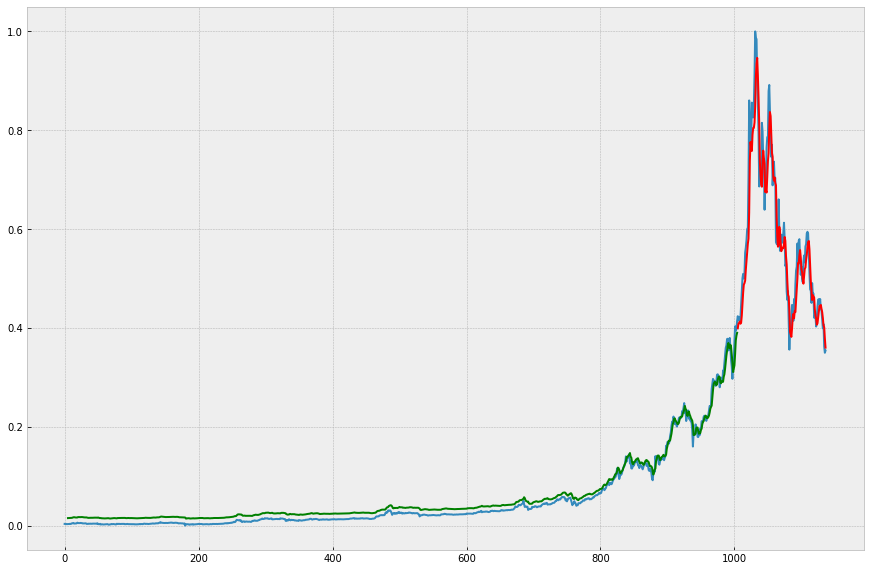

In [53]:
plt.figure(figsize=(15,10))
plt.plot(price)

split_pt = train_test_split + window_size
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g')
plt.plot(np.arange(split_pt, split_pt+len(test_predict), 1), test_predict, color='r')

In [66]:
#np.arange(window_size, split_pt, 1), train_predict
#np.arange(split_pt, split_pt+len(test_predict), 1), test_predict
trace = go.Scatter(x=np.arange(window_size, split_pt, 1), y=train_predict.reshape(1000), mode='lines', name='train')
trace2 = go.Scatter(x=np.arange(split_pt, split_pt+len(test_predict), 1), y=test_predict.reshape(132), mode='lines', name='test')
trace3 = go.Scatter(x=np.arange(1, len(price), 1), y=price, mode='line', name='original')
data = [trace, trace2, trace3]

py.offline.plot(data)

'file://c:\\Projects\\keras_talk\\temp-plot.html'